Epoch 1/15: 100%|██████████| 743/743 [00:37<00:00, 19.63it/s]


Epoch 1: Train Loss=0.0130, PSNR=20.17 | Val Loss=0.0101, PSNR=21.00, SSIM=0.7827
Saved best model at epoch 1 with val PSNR: 21.00


Epoch 2/15: 100%|██████████| 743/743 [00:35<00:00, 20.66it/s]


Epoch 2: Train Loss=0.0090, PSNR=21.60 | Val Loss=0.0085, PSNR=21.90, SSIM=0.8152
Saved best model at epoch 2 with val PSNR: 21.90


Epoch 3/15: 100%|██████████| 743/743 [00:35<00:00, 20.95it/s]


Epoch 3: Train Loss=0.0083, PSNR=22.05 | Val Loss=0.0080, PSNR=22.20, SSIM=0.8363
Saved best model at epoch 3 with val PSNR: 22.20


Epoch 4/15: 100%|██████████| 743/743 [00:34<00:00, 21.29it/s]


Epoch 4: Train Loss=0.0077, PSNR=22.41 | Val Loss=0.0081, PSNR=22.29, SSIM=0.8504
Saved best model at epoch 4 with val PSNR: 22.29


Epoch 5/15: 100%|██████████| 743/743 [00:35<00:00, 21.01it/s]


Epoch 5: Train Loss=0.0074, PSNR=22.67 | Val Loss=0.0076, PSNR=22.56, SSIM=0.8569
Saved best model at epoch 5 with val PSNR: 22.56


Epoch 6/15: 100%|██████████| 743/743 [00:37<00:00, 19.90it/s]


Epoch 6: Train Loss=0.0072, PSNR=22.85 | Val Loss=0.0073, PSNR=22.72, SSIM=0.8657
Saved best model at epoch 6 with val PSNR: 22.72


Epoch 7/15: 100%|██████████| 743/743 [00:42<00:00, 17.45it/s]


Epoch 7: Train Loss=0.0070, PSNR=22.98 | Val Loss=0.0068, PSNR=23.00, SSIM=0.8710
Saved best model at epoch 7 with val PSNR: 23.00


Epoch 8/15: 100%|██████████| 743/743 [00:37<00:00, 19.89it/s]


Epoch 8: Train Loss=0.0068, PSNR=23.12 | Val Loss=0.0066, PSNR=23.17, SSIM=0.8732
Saved best model at epoch 8 with val PSNR: 23.17


Epoch 9/15: 100%|██████████| 743/743 [00:35<00:00, 20.98it/s]


Epoch 9: Train Loss=0.0067, PSNR=23.23 | Val Loss=0.0073, PSNR=22.78, SSIM=0.8734


Epoch 10/15: 100%|██████████| 743/743 [00:36<00:00, 20.53it/s]


Epoch 10: Train Loss=0.0066, PSNR=23.32 | Val Loss=0.0065, PSNR=23.26, SSIM=0.8792
Saved best model at epoch 10 with val PSNR: 23.26


Epoch 11/15: 100%|██████████| 743/743 [00:35<00:00, 21.07it/s]


Epoch 11: Train Loss=0.0065, PSNR=23.37 | Val Loss=0.0069, PSNR=23.21, SSIM=0.8825


Epoch 12/15: 100%|██████████| 743/743 [00:37<00:00, 19.76it/s]


Epoch 12: Train Loss=0.0065, PSNR=23.41 | Val Loss=0.0063, PSNR=23.55, SSIM=0.8851
Saved best model at epoch 12 with val PSNR: 23.55


Epoch 13/15: 100%|██████████| 743/743 [00:36<00:00, 20.63it/s]


Epoch 13: Train Loss=0.0064, PSNR=23.50 | Val Loss=0.0063, PSNR=23.57, SSIM=0.8859
Saved best model at epoch 13 with val PSNR: 23.57


Epoch 14/15: 100%|██████████| 743/743 [00:39<00:00, 18.59it/s]


Epoch 14: Train Loss=0.0064, PSNR=23.53 | Val Loss=0.0064, PSNR=23.38, SSIM=0.8855


Epoch 15/15: 100%|██████████| 743/743 [00:37<00:00, 19.65it/s]


Epoch 15: Train Loss=0.0063, PSNR=23.57 | Val Loss=0.0063, PSNR=23.72, SSIM=0.8893
Saved best model at epoch 15 with val PSNR: 23.72


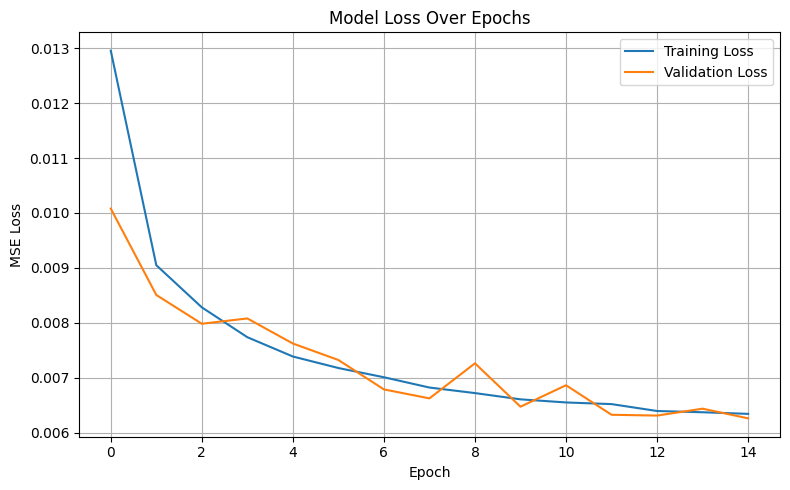

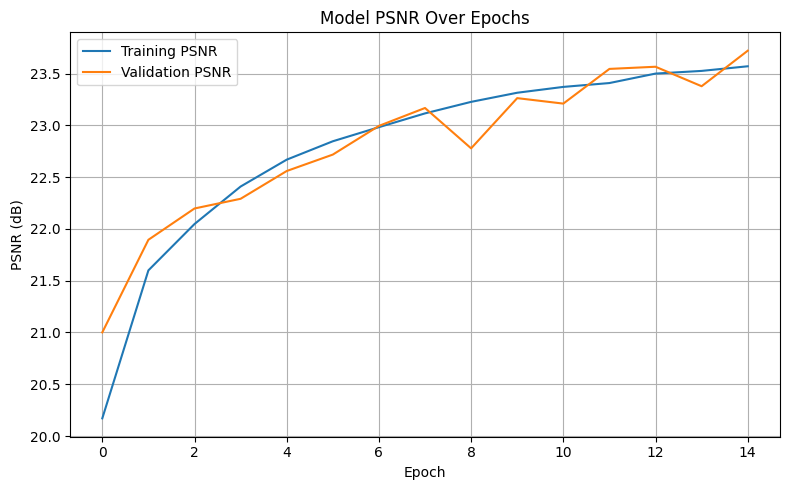

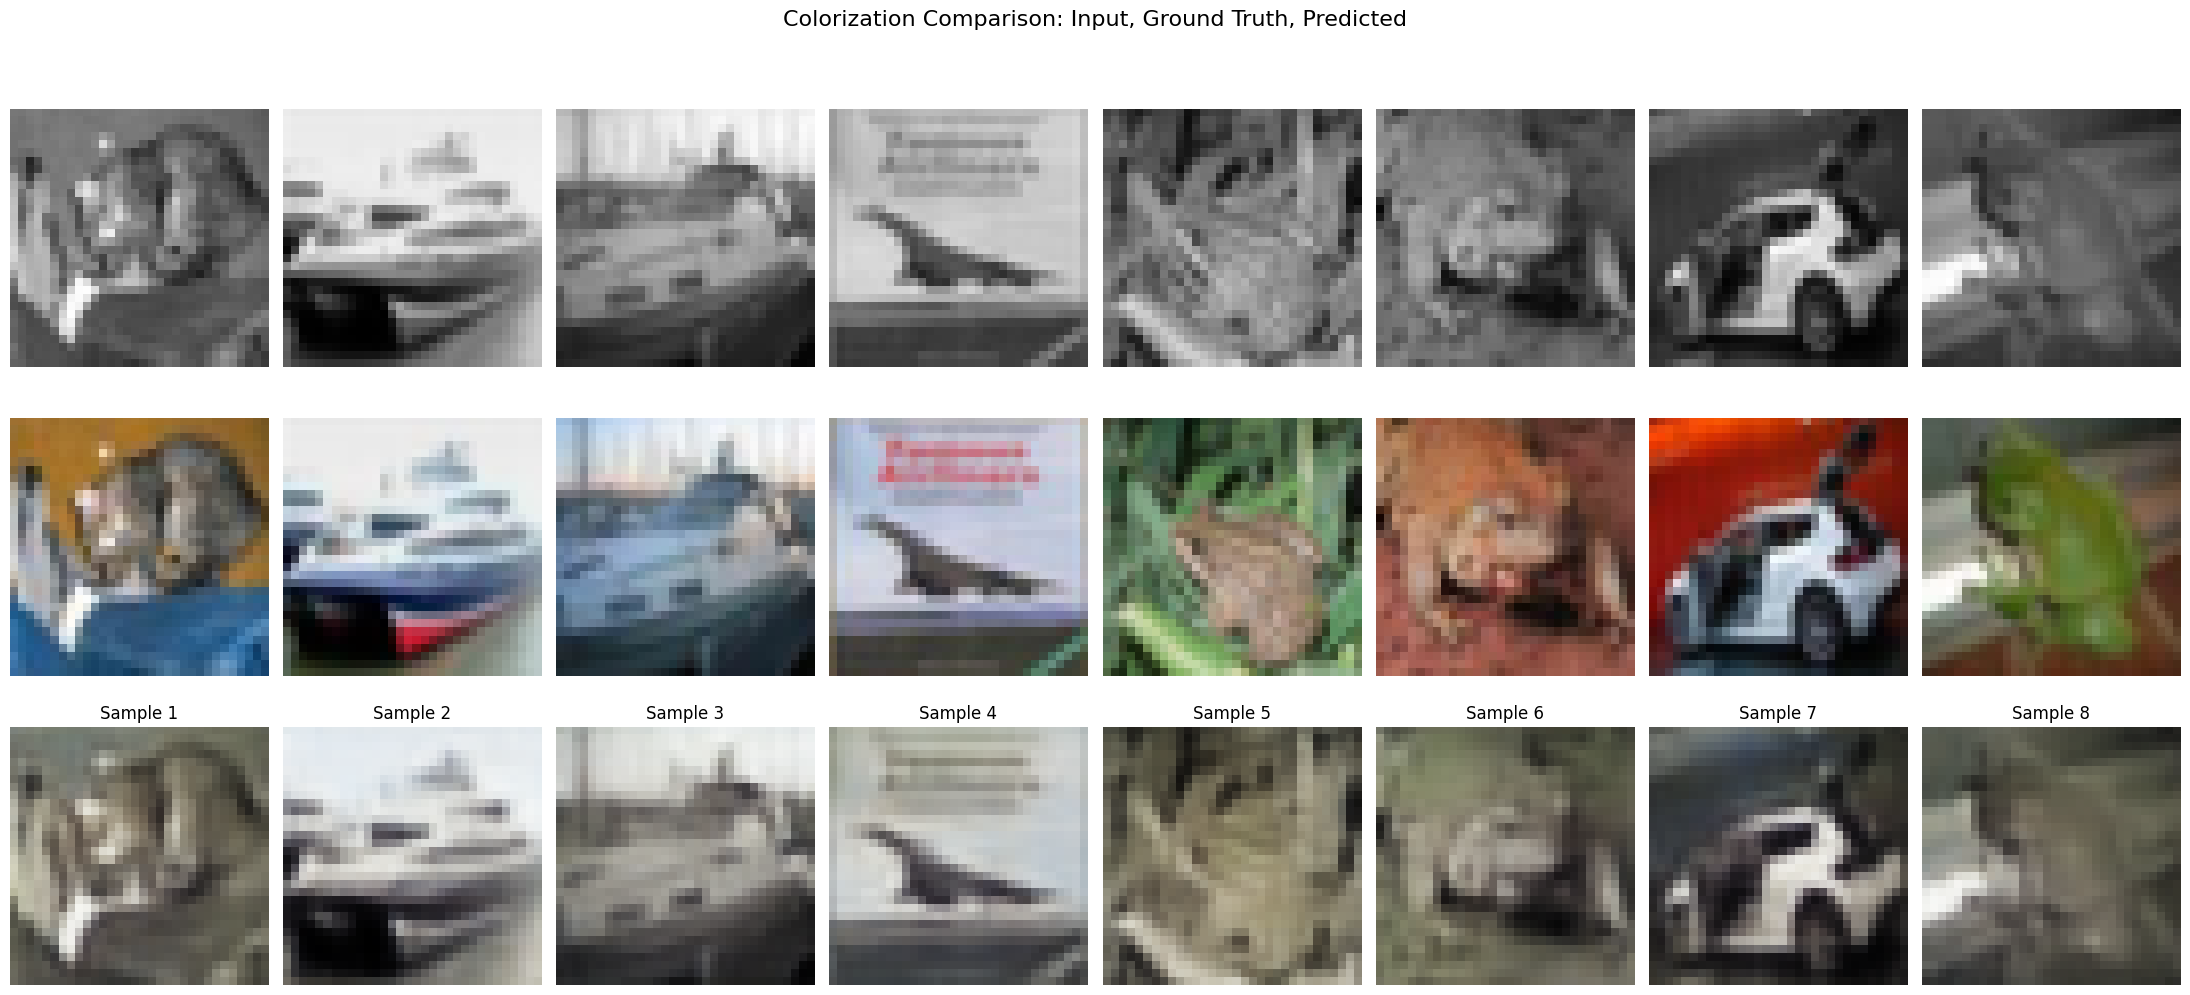

Test MSE: 0.0061 | Test PSNR: 23.66 dB | Test SSIM: 0.8966


In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, ConcatDataset, random_split
from torchvision.transforms import Grayscale
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as compute_psnr
from skimage.metrics import structural_similarity as compute_ssim
import random
import os

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

base_transform = transforms.Compose([
    transforms.ToTensor()
])

aug_transform = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4),
    transforms.ToTensor()
])

train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=base_transform)
augmented_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=aug_transform)
test_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=base_transform)

combined_dataset = ConcatDataset([train_dataset, augmented_dataset])

val_size = 5000
train_size = len(combined_dataset) - val_size
train_set, val_set = random_split(combined_dataset, [train_size, val_size])

batch_size = 128
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

to_gray = Grayscale(num_output_channels=1)

def rgb_to_gray_batch(images):
    return to_gray(images)

class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(128, 128, 3, padding=1), nn.ReLU(), nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, padding=1), nn.ReLU(), nn.Upsample(scale_factor=2),
            nn.Conv2d(64, 3, 3, padding=1), nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ColorizationNet().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 15

def psnr(pred, target):
    pred = pred.clamp(0, 1).detach().cpu().numpy()
    target = target.clamp(0, 1).detach().cpu().numpy()
    batch = pred.shape[0]
    results = []
    for i in range(batch):
        results.append(compute_psnr(target[i].transpose(1,2,0), pred[i].transpose(1,2,0), data_range=1.0))
    return np.mean(results)

def ssim(pred, target):
    pred = pred.clamp(0, 1).cpu().numpy()
    target = target.clamp(0, 1).cpu().numpy()
    batch = pred.shape[0]
    results = []
    for i in range(batch):
        pred_img = np.transpose(pred[i], (1,2,0))
        target_img = np.transpose(target[i], (1,2,0))
        ssim_val = 0
        for c in range(pred_img.shape[2]):
            ssim_val += compute_ssim(pred_img[:,:,c], target_img[:,:,c], data_range=1.0)
        ssim_val /= pred_img.shape[2]
        results.append(ssim_val)
    return np.mean(results)

def evaluate_with_ssim(loader, model, criterion):
    model.eval()
    total_loss, total_psnr, total_ssim = 0.0, 0.0, 0.0
    n_samples = 0
    with torch.no_grad():
        for color_imgs, _ in loader:
            gray_imgs = rgb_to_gray_batch(color_imgs.cpu())
            color_imgs = color_imgs.to(device)
            gray_imgs = gray_imgs.to(device)
            outputs = model(gray_imgs)
            loss = criterion(outputs, color_imgs)
            total_loss += loss.item() * color_imgs.size(0)
            total_psnr += psnr(outputs, color_imgs) * color_imgs.size(0)
            total_ssim += ssim(outputs, color_imgs) * color_imgs.size(0)
            n_samples += color_imgs.size(0)
    avg_loss = total_loss / n_samples
    avg_psnr = total_psnr / n_samples
    avg_ssim = total_ssim / n_samples
    return avg_loss, avg_psnr, avg_ssim

train_losses, val_losses, train_psnrs, val_psnrs = [], [], [], []
best_val_psnr = 0

for epoch in range(num_epochs):
    model.train()
    running_loss, running_psnr, n = 0, 0, 0
    for color_imgs, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        gray_imgs = rgb_to_gray_batch(color_imgs.cpu())
        color_imgs = color_imgs.to(device)
        gray_imgs = gray_imgs.to(device)
        optimizer.zero_grad()
        outputs = model(gray_imgs)
        loss = criterion(outputs, color_imgs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * color_imgs.size(0)
        running_psnr += psnr(outputs, color_imgs) * color_imgs.size(0)
        n += color_imgs.size(0)
    train_loss = running_loss / n
    train_psnr_avg = running_psnr / n

    val_loss, val_psnr, val_ssim = evaluate_with_ssim(val_loader, model, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_psnrs.append(train_psnr_avg)
    val_psnrs.append(val_psnr)

    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, PSNR={train_psnr_avg:.2f} | "
          f"Val Loss={val_loss:.4f}, PSNR={val_psnr:.2f}, SSIM={val_ssim:.4f}")

    if val_psnr > best_val_psnr:
        best_val_psnr = val_psnr
        torch.save(model.state_dict(), 'best_colorization_model.pth')
        print(f"Saved best model at epoch {epoch+1} with val PSNR: {val_psnr:.2f}")

# Save the final model
torch.save(model.state_dict(), "colorization_final.pth")
torch.save(model, "colorization_entire_model.pth")

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_psnrs, label="Training PSNR")
plt.plot(val_psnrs, label="Validation PSNR")
plt.title("Model PSNR Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("PSNR (dB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

def plot_comparison(grays, trues, preds, n=5, figsize=(22, 10)):
    plt.figure(figsize=figsize)
    row_titles = ["Grayscale Input", "Ground Truth (True Color)", "Predicted Colorization"]
    for row, images in enumerate([grays, trues, preds]):
        for i in range(n):
            plt.subplot(3, n, row * n + i + 1)
            img = images[i].cpu().numpy().squeeze()
            if row == 0:
                plt.imshow(img, cmap='gray', vmin=0, vmax=1)
            else:
                if img.shape[0] == 3:
                    img = np.transpose(img, (1,2,0))
                plt.imshow(np.clip(img, 0, 1))
            plt.axis('off')
            if i == 0:
                plt.ylabel(row_titles[row], fontsize=14, fontweight='bold')
            if row == 2:
                plt.title(f"Sample {i+1}", fontsize=12)
    plt.suptitle("Colorization Comparison: Input, Ground Truth, Predicted", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

n = 8
test_color_imgs, _ = next(iter(test_loader))
test_gray_imgs = rgb_to_gray_batch(test_color_imgs.cpu())
test_color_imgs, test_gray_imgs = test_color_imgs.to(device), test_gray_imgs.to(device)
model.eval()
with torch.no_grad():
    preds = model(test_gray_imgs)
plot_comparison(test_gray_imgs, test_color_imgs, preds, n=n)

test_loss, test_psnr, test_ssim = evaluate_with_ssim(test_loader, model, criterion)
print(f"Test MSE: {test_loss:.4f} | Test PSNR: {test_psnr:.2f} dB | Test SSIM: {test_ssim:.4f}")

torch.save(model.state_dict(), "colorization_final.pth")
